<a href="https://colab.research.google.com/github/christianbaptista/dio-ml-ai-projects/blob/main/catsvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from keras.layers import GlobalAveragePooling2D
from keras.applications import MobileNet

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
x = np.random.rand(2,4,5,3)
y = keras.layers.GlobalAveragePooling2D()(x)
y.shape

TensorShape([2, 3])

In [27]:
!wget --no-check-certificate \
"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
-O "/tmp/cats-and-dogs.zip"

--2024-12-11 17:12:31--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.207.53.2, 2600:1408:ec00:887::317f, 2600:1408:ec00:889::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.207.53.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  49.0MB/s    in 15s     

2024-12-11 17:12:46 (53.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [28]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Treinando
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160,160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE,image_size=IMG_SIZE)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2000 files belonging to 2 classes.


In [29]:
# Validando
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


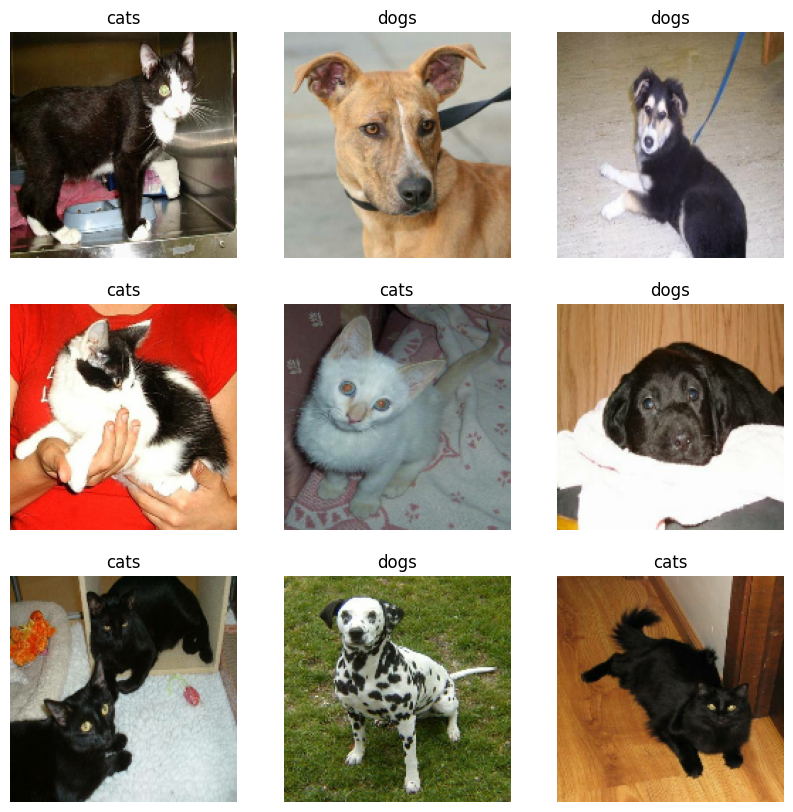

In [30]:
# Exibindo as 9 primeiras imagens e rotulos do treino
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [32]:
#carregando o modelo da imagenet
IMG_SHAPE = IMG_SIZE + (3,)
model=tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,weights='imagenet',include_top=False)

In [34]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1024)
